In [29]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [30]:
from fastbook import *
from fastai.vision.widgets import *

In [13]:
path = untar_data(URLs.PLANET_SAMPLE)
path.ls()

(#2) [Path('/root/.fastai/data/planet_sample/train'),Path('/root/.fastai/data/planet_sample/labels.csv')]

In [14]:
Path.BASE_PATH = path 
(path/'train').ls()

(#1000) [Path('train/train_26750.jpg'),Path('train/train_28128.jpg'),Path('train/train_34117.jpg'),Path('train/train_20768.jpg'),Path('train/train_34866.jpg'),Path('train/train_1491.jpg'),Path('train/train_38243.jpg'),Path('train/train_21147.jpg'),Path('train/train_20981.jpg'),Path('train/train_14405.jpg')...]

In [15]:
df = pd.read_csv(path/'labels.csv')
df.head()

,image_name,tags
0,train_21983,partly_cloudy primary
1,train_9516,clear cultivation primary water
2,train_12664,haze primary
3,train_36960,clear primary
4,train_5302,haze primary road


In [21]:
# get the image path from image_name
def get_x(row):
  return path/'train'/(row['image_name'] +'.jpg')

get_x(df.iloc[0])

Path('train/train_21983.jpg')

In [22]:
# get the image labels from the tags
def get_y(row):
  return row['tags'].split(' ')

get_y(df.iloc[0])

['partly_cloudy', 'primary']

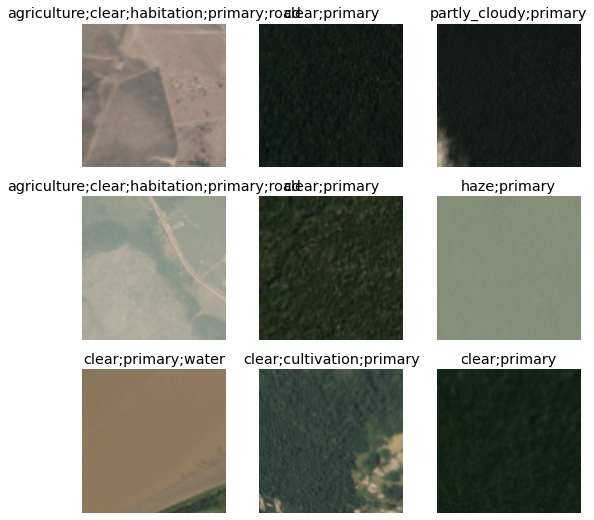

In [26]:
# now, create a data block with a random splitter 
planets = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                    get_x = get_x,
                    get_y = get_y,
                    splitter = RandomSplitter(),
                    item_tfms = Resize(224),
                    batch_tfms = aug_transforms(mult=1.5, min_scale=0.75))

dls = planets.dataloaders(df)
dls.train.show_batch(ncols = 3, nrows = 3)

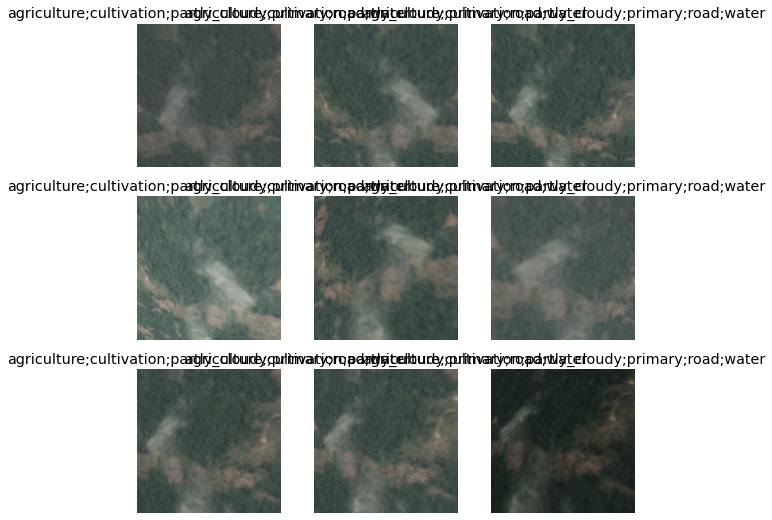

In [27]:
dls.train.show_batch(ncols = 3, nrows = 3, unique=True)

In [28]:
learn = cnn_learner(dls, resnet34, metrics=partial(accuracy_multi, thresh=0.4), loss_func=nn.BCEWithLogitsLoss())
learn.lr_find()

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


KeyboardInterrupt: ignored

In [ ]:
learn.fine_tune(3, base_lr = , freeze_epochs=5)

In [ ]:
# tune the thresh hyperparamter
preds, targs = learn.get_preds()